# Rectification

In [63]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
sys.path.append("../src/")
%reload_ext autoreload
import proj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Average PSNR: 31.645344059863714
Average SSIM: 0.9367439663626667


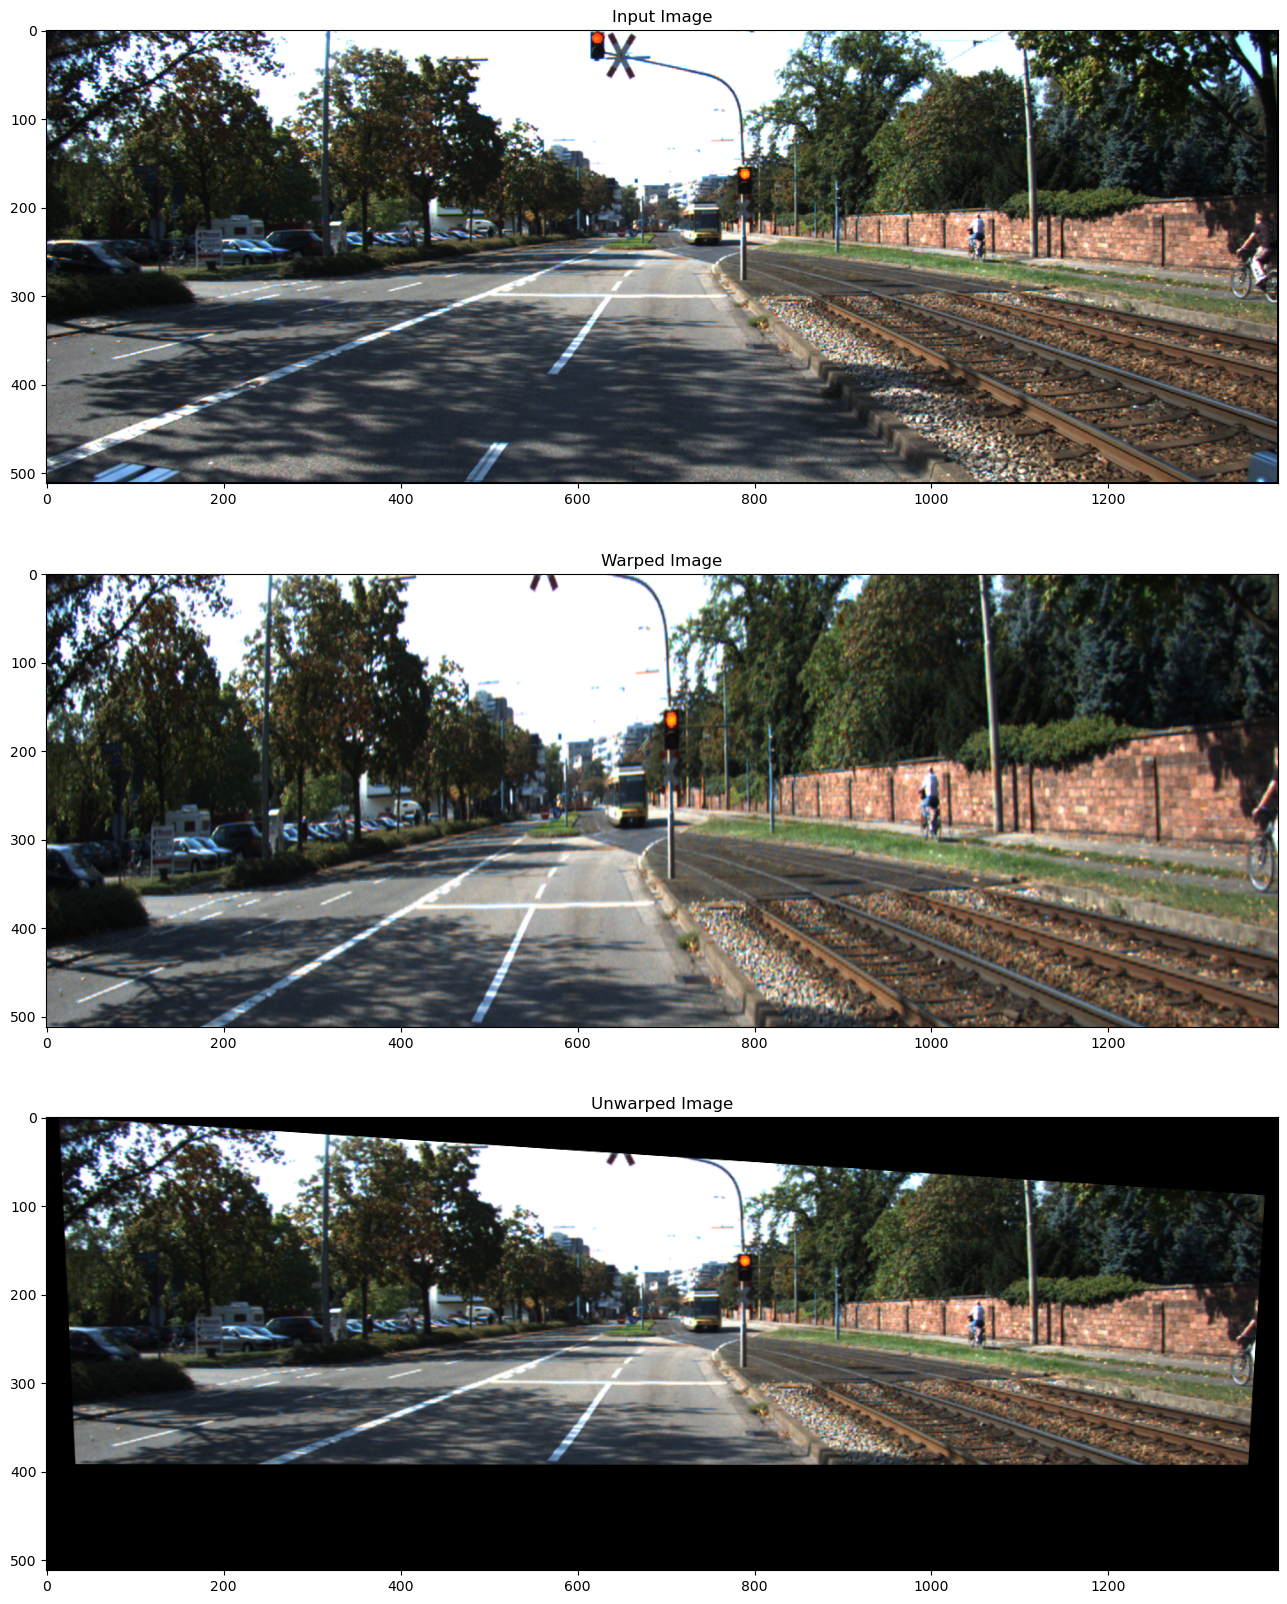

In [65]:
# Load Data
imgs_truth = np.array(list(proj.load_imgs("../data/stage2/stage2_rectification/input_imgs/")))
imgs_warped = np.array(list(proj.load_imgs("../data/stage2/stage2_rectification/warped_imgs/")))


# Unwarp Images and Calculate PSNR/SSIM
psnr_avg = 0
ssim_avg = 0
n_images = len(imgs_warped)

for i in range(n_images):
    img1 = imgs_warped[i]
    img2 = imgs_truth[i]

    kp1, kp2, matches = proj.find_matches(img1, img2)
    M, mask = proj.find_homography(kp1, kp2, matches)
    unwarped_img = proj.warp_image(img1, M)
    
    (psnr, ssim) = proj.psnr_ssim_rect(img2, unwarped_img)
    psnr_avg += psnr
    ssim_avg += ssim

psnr_avg /= n_images
ssim_avg /= n_images


# Print/Plot Outputs
print(f"Average PSNR: {psnr_avg}")
print(f"Average SSIM: {ssim_avg}")

plt.figure(figsize=(20, 20))
plt.subplot(3, 1, 1, title='Input Image')
plt.imshow(img2)
plt.subplot(3, 1, 2, title='Warped Image')
plt.imshow(img1)
plt.subplot(3, 1, 3, title='Unwarped Image')
plt.imshow(unwarped_img)

# Stereo